<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/module4/Final_of_Porter_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# initial data

In [33]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [34]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [35]:
bikes = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv")

In [36]:
bikes2  = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv")

In [37]:
bikes2

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,12/1/12,4,0,0,0,1,0.81,0,4.22,3.9980
1,12/1/12,4,1,0,0,1,0.81,0,4.22,3.9980
2,12/1/12,4,2,0,0,2,0.81,0,4.22,3.9980
3,12/1/12,4,3,0,0,2,0.81,9,4.22,1.9982
4,12/1/12,4,4,0,0,1,0.81,6,4.22,3.0014
...,...,...,...,...,...,...,...,...,...,...
737,12/31/12,1,19,0,1,2,0.60,11,4.22,1.0016
738,12/31/12,1,20,0,1,2,0.60,11,4.22,1.0016
739,12/31/12,1,21,0,1,1,0.60,11,4.22,1.0016
740,12/31/12,1,22,0,1,1,0.56,9,4.22,1.9982


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [39]:
bikes = pd.DataFrame(bikes)


In [ ]:
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


# Kates sample data

In [40]:
def wrangle_data(data):
  # Data wrangling
  data.isna().sum()
  data=data.dropna()
  
  # rename the columns as the one in clean data to use merge by this column
  data.rename(columns={'hum': 'humidity_percentage'}, inplace = True)
  data.rename(columns={'temp_c': 'temperature_celsius'}, inplace = True)
  data.rename(columns={'feels_like_c': 'feels_like_temperature_celsius'}, inplace = True)
  
  
  # remove timestamp on training data 
  data['date'] = pd.to_datetime(data['dteday'])
  # month
  data['month'] = pd.DatetimeIndex(data['date']).month
  # week day name
  data['day_name'] = pd.DatetimeIndex(data['date']).day_name()
  # day of year
  data['day_of_year'] = pd.DatetimeIndex(data['date']).dayofyear

  # day of the week
  data['day'] = pd.DatetimeIndex(data['date']).day
  # month
  data['month'] = pd.DatetimeIndex(data['date']).month
  # day of week
  data['dayofweek'] = pd.DatetimeIndex(data['date']).dayofweek
  # week day name
  # data['day_name'] = pd.DatetimeIndex(data['date']).day_name()
  # month of year
  # data['month_name'] = pd.DatetimeIndex(data['date']).month_name()
  # add date and hr
  # data['datetimestamp'] = pd.to_datetime(data.date) + pd.to_timedelta(data.hr, unit='h')
  
  data['date'] = (data['date'] - pd.to_datetime('1/1/2011') )/ np.timedelta64(1,'D')

  # One hot encoding
  # categorical feautures  season : season (1:winter, 2:spring, 3:summer, 4:fall) 
  data['season']=data['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
  # weathersit weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy ,- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist , - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds , - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
  data['weathersit']=data['weathersit'].map({1:'clear', 2:'mist_cloudy', 3:'light_rain_snow', 4:'heavy_rain_snow'})

  # Get target feature
  data['target'] = data['casual'] + data['registered']
  
  df = pd.get_dummies(data, columns = ['season', 'weathersit', 'day_name'], prefix='', prefix_sep='')

  drop_features = ['dteday', 'casual', 'registered']
  df = df.drop(columns=drop_features)
  
  # exclude outliers from the data
  data = df[(df['feels_like_temperature_celsius'] <= 44.9972) & (df['temperature_celsius'] <= 37.12)]

  return data

In [41]:
bikes3 = wrangle_data(bikes)
# bikes.info()
bikes4  = pd.read_csv("https://raw.githubusercontent.com/carlosdgerez/machine_learning/main/module4/katesbikes.csv")

In [45]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
bikes3

,hr,holiday,workingday,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,date,month,day_of_year,...,heavy_rain_snow,light_rain_snow,mist_cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0.81,0,3.28,3.0014,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0.80,0,2.34,1.9982,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0.80,0,2.34,1.9982,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0.75,0,3.28,3.0014,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0.75,0,3.28,3.0014,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,19,0,1,0.66,0,7.04,7.0010,699.0,11,335,...,0,0,0,1,0,0,0,0,0,0
16633,20,0,1,0.66,0,7.04,7.0010,699.0,11,335,...,0,0,0,1,0,0,0,0,0,0
16634,21,0,1,0.75,6,6.10,5.0012,699.0,11,335,...,0,0,0,1,0,0,0,0,0,0
16635,22,0,1,0.75,0,6.10,5.9978,699.0,11,335,...,0,0,0,1,0,0,0,0,0,0


In [46]:
# move the target to the final line 
column_to_move = bikes3.pop("target")

# insert column with insert(location, column_name, column_value)
bikes3.insert(27, "target", column_to_move)          

In [ ]:
# debugging just trying deleting the objects
# bikes3 = bikes3.drop(['date'], axis=1)


In [47]:
bikes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16631 entries, 0 to 16636
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hr                              16631 non-null  int64  
 1   holiday                         16631 non-null  int64  
 2   workingday                      16631 non-null  int64  
 3   humidity_percentage             16631 non-null  float64
 4   windspeed                       16631 non-null  int64  
 5   temperature_celsius             16631 non-null  float64
 6   feels_like_temperature_celsius  16631 non-null  float64
 7   date                            16631 non-null  float64
 8   month                           16631 non-null  int64  
 9   day_of_year                     16631 non-null  int64  
 10  day                             16631 non-null  int64  
 11  dayofweek                       16631 non-null  int64  
 12  fall                            

In [48]:
# dividing the set
#train_dataset = bikes3.sample(frac=0.8, random_state=0)
#test_dataset = bikes3.drop(train_dataset.index)
train_dataset = bikes3[bikes3.date > 119]
test_dataset = bikes3[bikes3.month <= 119]

In [49]:
train_dataset

,hr,holiday,workingday,humidity_percentage,windspeed,temperature_celsius,feels_like_temperature_celsius,date,month,day_of_year,...,light_rain_snow,mist_cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,target
2786,0,0,0,0.67,6,11.74,11.9972,120.0,5,121,...,0,0,0,0,0,1,0,0,0,96
2787,1,0,0,0.69,7,11.74,11.9972,120.0,5,121,...,0,0,0,0,0,1,0,0,0,59
2788,2,0,0,0.77,7,11.74,11.9972,120.0,5,121,...,0,0,0,0,0,1,0,0,0,50
2789,3,0,0,0.82,7,10.80,11.0006,120.0,5,121,...,0,0,0,0,0,1,0,0,0,23
2790,4,0,0,0.76,7,10.80,11.0006,120.0,5,121,...,0,0,0,0,0,1,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,19,0,1,0.66,0,7.04,7.0010,699.0,11,335,...,0,0,1,0,0,0,0,0,0,377
16633,20,0,1,0.66,0,7.04,7.0010,699.0,11,335,...,0,0,1,0,0,0,0,0,0,245
16634,21,0,1,0.75,6,6.10,5.0012,699.0,11,335,...,0,0,1,0,0,0,0,0,0,183
16635,22,0,1,0.75,0,6.10,5.9978,699.0,11,335,...,0,0,1,0,0,0,0,0,0,163


In [50]:
# generating train and test features and labels

train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('target')
test_labels = test_features.pop('target')


In [ ]:
test_labels

0         16
1         40
2         32
3         13
4          1
        ... 
10073    102
10074     97
10075     39
10076     55
10077     33
Name: target, Length: 2770, dtype: int64

# Start working with the model

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [51]:
normalizer = tf.keras.layers.Normalization(axis=-1)



Create a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) you defined earlier and adapted to the whole dataset:

In [52]:
normalizer.adapt(np.array(train_features))

In [53]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=64, activation= 'relu', input_shape=(27,)),
    #layers.Dropout(0.1),
    layers.Dense(units=64, activation= 'relu'),
    layers.Dense(units=32, activation= 'relu'),
    layers.Dense(1)

])

When you call `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [ ]:
linear_model.predict(train_features[:10])

# RMSPROP

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

# linear_model.compile(
#     optimizer=tf.keras.optimizers.RMSprop(
#         learning_rate=0.001,
#         rho=0.9,
#         momentum=0.2,
#         epsilon=1e-07,
#         centered=False,
#         name='RMSprop'
#     ), 
#     loss='mean_absolute_error'
# )

# ADAM

In [ ]:

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10e-3),
    loss='mean_absolute_error')

# MODEL FIT

In [ ]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1000,
   # batch_size=20,
   # callbacks=[early_stop],
    # allow logging.
    verbose=2,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/1000
347/347 - 1s - loss: 99.3525 - val_loss: 130.8903 - 1s/epoch - 4ms/step
Epoch 2/1000
347/347 - 1s - loss: 92.5222 - val_loss: 121.5279 - 839ms/epoch - 2ms/step
Epoch 3/1000
347/347 - 1s - loss: 75.3764 - val_loss: 98.0982 - 813ms/epoch - 2ms/step
Epoch 4/1000
347/347 - 1s - loss: 63.4417 - val_loss: 89.8179 - 819ms/epoch - 2ms/step
Epoch 5/1000
347/347 - 1s - loss: 53.0541 - val_loss: 81.0308 - 826ms/epoch - 2ms/step
Epoch 6/1000
347/347 - 1s - loss: 45.3952 - val_loss: 66.5585 - 827ms/epoch - 2ms/step
Epoch 7/1000
347/347 - 1s - loss: 41.5017 - val_loss: 64.4802 - 829ms/epoch - 2ms/step
Epoch 8/1000
347/347 - 1s - loss: 39.3687 - val_loss: 58.4817 - 828ms/epoch - 2ms/step
Epoch 9/1000
347/347 - 1s - loss: 36.5135 - val_loss: 56.3672 - 801ms/epoch - 2ms/step
Epoch 10/1000
347/347 - 1s - loss: 35.3575 - val_loss: 56.4264 - 821ms/epoch - 2ms/step
Epoch 11/1000
347/347 - 1s - loss: 34.3149 - val_loss: 52.6181 - 808ms/epoch - 2ms/step
Epoch 12/1000
347/347 - 1s - loss: 34.2932

KeyboardInterrupt: ignored

Visualize the model's training progress using the stats stored in the `history` object:

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,26.741762,28.278696,995
996,26.524803,28.929731,996
997,26.842875,29.054251,997
998,26.803755,27.049185,998
999,26.493330,26.920292,999


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xscale('log')
  plt.xlim([1, 2000])
  plt.ylim([1, 80])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.legend()
  plt.grid(True)

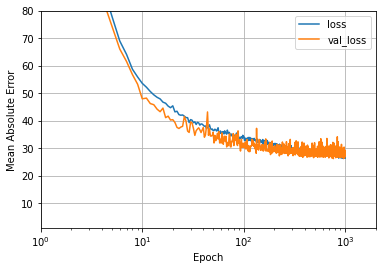

In [ ]:
plot_loss(history)

In [ ]:
# test_results = {}

# test_results['bikes_evaluation'] = linear_model.evaluate(
#     test_features,
#     test_labels, verbose=2)
# predictions = linear_model.predict(test_features)
# predictionsDataframe = pd.DataFrame(predictions)
# test_labelsDataFrame = pd.DataFrame(test_labels).reset_index()
# comparativeFrame = test_labelsDataFrame.join(predictionsDataframe)
# comparativeFrame

In [ ]:
from sklearn import metrics as sm
predictions = linear_model.predict(test_features)

print("Mean absolute error", round(sm.mean_absolute_error(test_labels, predictions), 2))
print("Mean squared error", round(sm.mean_squared_error(test_labels, predictions), 2))
print("Median absolute error", round(sm.median_absolute_error (test_labels, predictions), 2))
print("Explain variance score", round(sm.explained_variance_score(test_labels, predictions), 2))
print("R2 score", round(sm.r2_score(test_labels, predictions), 4))
print("Root Mean Squared error", round(sm.mean_squared_error(test_labels, predictions, squared = False), 4))

Mean absolute error 26.07
Mean squared error 1786.81
Median absolute error 14.86
Explain variance score 0.94
R2 score 0.9439
Root Mean Squared error 42.2707


# From here is the code for the graph of the residuals predictions

In [ ]:
predictions= linear_model.predict(test_features)


In [ ]:
prediction = pd.DataFrame(predictions)
prediction

,0
0,47.296814
1,113.605598
2,43.121349
3,17.901268
4,7.902695
...,...
3321,604.526062
3322,193.827530
3323,26.342575
3324,187.775574


In [ ]:
labels = pd.DataFrame(test_labels).reset_index(drop=True)
labels

,target
0,16
1,94
2,34
3,9
4,6
...,...
3321,561
3322,208
3323,19
3324,169


In [ ]:
residuals = prediction[0] - labels.target
residual= pd.DataFrame(residuals)

In [ ]:
residual

,0
0,31.296814
1,19.605598
2,9.121349
3,8.901268
4,1.902695
...,...
3321,43.526062
3322,-14.172470
3323,7.342575
3324,18.775574


In [ ]:
residual['percents_residuals'] = (prediction[0])/labels.target

In [ ]:
residual

,0,percents_residuals
0,31.296814,2.956051
1,19.605598,1.208570
2,9.121349,1.268275
3,8.901268,1.989030
4,1.902695,1.317116
...,...,...
3321,43.526062,1.077587
3322,-14.172470,0.931863
3323,7.342575,1.386451
3324,18.775574,1.111098


In [ ]:
residual.percents_residuals.value_counts()

2.956051    1
0.919433    1
1.057933    1
0.928187    1
0.974876    1
           ..
1.101407    1
1.013934    1
0.919635    1
1.042552    1
0.878179    1
Name: percents_residuals, Length: 3326, dtype: int64

In [ ]:
residual.describe()
residual.drop(0, inplace=True, axis=1)

In [ ]:
import altair as alt
alt.themes.enable('fivethirtyeight')

ThemeRegistry.enable('fivethirtyeight')

In [ ]:
alt.Chart(residual).mark_bar().encode(
    alt.X('percents_residuals:Q', axis=alt.Axis(title=''),bin=alt.Bin(maxbins=105), scale=alt.Scale(domain=(-4,10)) ),
    y='count()'
).configure_axis(grid=False)

alt.Chart(...)